In [44]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("Argmax(Prob) varbatchrun402.csv")
print(df.head())

   Unnamed: 0                                site_address  transition_true  \
0           0  2701 Newell St, Los Angeles, CA 90039, USA             2014   
1           1  1501 E 41st St, Los Angeles, CA 90011, USA             2017   
2           2    1004 Cudahy Pl, San Diego, CA 92110, USA                0   
3           3     9340 Cabot Dr, San Diego, CA 92126, USA                0   
4           4  9020 Activity Rd, San Diego, CA 92126, USA                0   

   transition_predicted  
0                  2014  
1                  2017  
2                  2013  
3                     0  
4                     0  


In [55]:
# the last two columns using column indexing
last_two_columns = df.iloc[:, -2:]

# the number of rows where the values in the last two columns are the same
count = len(last_two_columns[last_two_columns['transition_true'] == last_two_columns['transition_predicted']])

print("Number of right classified transition year:", count)

Number of right classified transition year: 42


In [56]:
y_true = df['transition_true'].values
y_pred = df['transition_predicted'].values

# the reroof detection accuracy
accuracy = np.sum(y_true == y_pred) / len(y_true)
print("Reroof Detection Accuracy:", accuracy)

# the average error in years
error = np.sum(np.abs(y_true - y_pred)) / len(y_true)
print("Average Error in Years:", error)


Reroof Detection Accuracy: 0.7636363636363637
Average Error in Years: 293.3636363636364


<Figure size 1000x800 with 0 Axes>

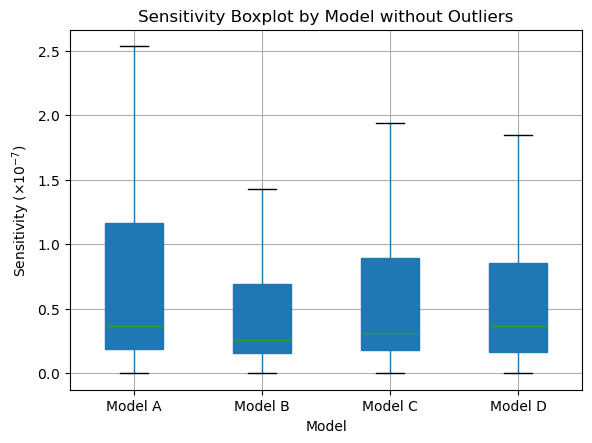

In [53]:
# Corrected code for creating a boxplot with specified colors for each model, without outliers

import matplotlib.pyplot as plt
import pandas as pd

# Load the data from CSV file (assuming it's correctly formatted)
# Load the data from CSV file
sensitivity_results = pd.read_csv('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/sensitivity_results_1000_05_2.csv')
# Define function for formatting the y-axis labels to scientific notation
def format_ylabel(ax, label):
    # Use the ticklabel_format to force scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    plt.draw()
    
    # Get the offset text, which is the scientific notation exponent
    offset_text = ax.yaxis.get_offset_text().get_text()
    if offset_text:
        ax.yaxis.offsetText.set_visible(False)
        label_with_offset = f"{label} ({offset_text})"
    else:
        label_with_offset = label
    
    ax.set_ylabel(label_with_offset, fontsize=10)
    return ax

# Map model names for readability
model_name_mapping = {
    'sdr_kfold_shap_10_aplha03_25_1000_l1': 'Model A',
    'sir_intensity_total_shap_10_aplha03': 'Model B',
    'binary_classifier_sota_10': 'Model C',
    'sdr_average_10_aplha03_1000_l1': 'Model D'
}
sensitivity_results['model'] = sensitivity_results['model'].map(model_name_mapping)


# Create the boxplot and keep references to the artist elements
plt.figure(figsize=(10, 8))
boxplot_artists = sensitivity_results.boxplot(column='sensitivity', by='model', patch_artist=True, showfliers=False, return_type='dict')

ax = plt.gca()
format_ylabel(ax, "Sensitivity")

# Removing pandas automatic 'Grouped by' title and setting our own
plt.suptitle('')
plt.title('Sensitivity Boxplot by Model without Outliers')

# Labeling the axes
plt.xlabel('Model')


# Display the plot
plt.show()


<Figure size 1000x800 with 0 Axes>

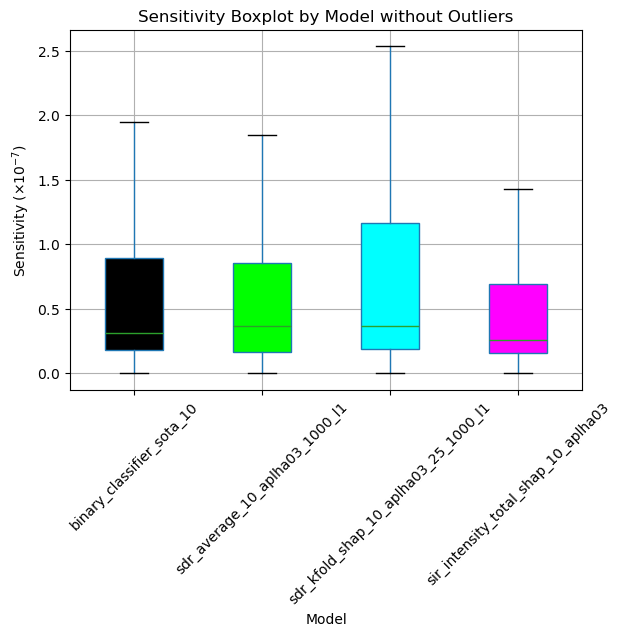

In [42]:
# Since the user requested to use the provided function and the previous code snippet to generate a boxplot, let's integrate them.
# This code will plot a boxplot of sensitivities grouped by model, without outliers, and with a scientific notation on the y-axis.

import matplotlib.pyplot as plt
import pandas as pd


# Load the data from CSV file
sensitivity_results = pd.read_csv('/Users/Lisa/Desktop/Master Thesis/RoofNetXAI/Notebooks/past_values_10_03_new/sensitivity_results_1000_05_2.csv')

color_mapping = {
    'Model A': 'black',
    'Model B': 'lime',
    'Model C': 'cyan',
    'Model D': 'magenta'
}

# Define function for formatting the y-axis labels to scientific notation
def format_ylabel(ax, label):
    # Use the ticklabel_format to force scientific notation
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
    plt.draw()
    
    # Get the offset text, which is the scientific notation exponent
    offset_text = ax.yaxis.get_offset_text().get_text()
    if offset_text:
        ax.yaxis.offsetText.set_visible(False)
        label_with_offset = f"{label} ({offset_text})"
    else:
        label_with_offset = label
    
    ax.set_ylabel(label_with_offset, fontsize=10)
    return ax

plt.figure(figsize=(10, 8))

# Create the boxplot with patch_artist=True to fill with color
boxplot_dict = sensitivity_results.boxplot(column='sensitivity', by='model', patch_artist=True, showfliers=False, return_type='dict')

# Coloring each box according to the color mapping
for box, color in zip(boxplot_dict['sensitivity']['boxes'], color_mapping.values()):
    box.set_facecolor(color)

ax = plt.gca()
format_ylabel(ax, "Sensitivity")

plt.title('Sensitivity Boxplot by Model without Outliers')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.suptitle('')  # Remove automatic 'Grouped by' title

plt.show()
